In [55]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np


In [56]:
#Read the data from csv file
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


### Description of columns
- MOG: Millege of the car(mile per Gallon) (This is Y_columns to be predicted)
- HP: Hourse Power of the car (X1 column)
- VOL: Volume of the car (size) (X2 column)
- SP: Top speed of the car (Miles per Hour) (X3 column)
- WT: Weight of the car(Pounds) (X4 Columns)

In [70]:
#rearrange the columns
cars = pd.DataFrame(cars, columns=["HP","VOL","SP", "WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [72]:
cars.info

<bound method DataFrame.info of      HP  VOL          SP         WT        MPG
0    49   89  104.185353  28.762059  53.700681
1    55   92  105.461264  30.466833  50.013401
2    55   92  105.461264  30.193597  50.013401
3    70   92  113.461264  30.632114  45.696322
4    53   92  104.461264  29.889149  50.504232
..  ...  ...         ...        ...        ...
76  322   50  169.598513  16.132947  36.900000
77  238  115  150.576579  37.923113  19.197888
78  263   50  151.598513  15.769625  34.000000
79  295  119  167.944460  39.423099  19.833733
80  236  107  139.840817  34.948615  12.101263

[81 rows x 5 columns]>

In [74]:
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

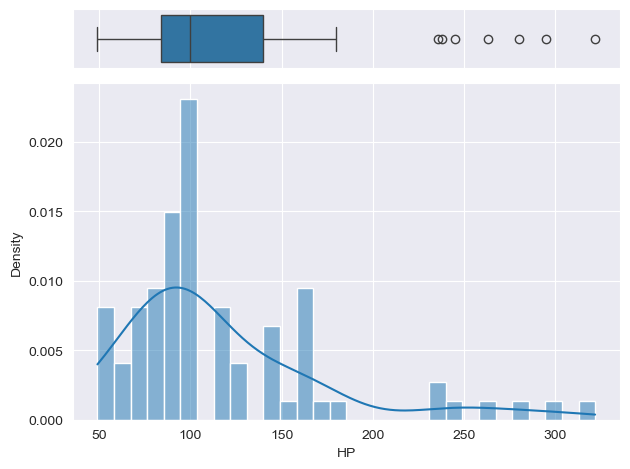

In [58]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h') 
ax_box.set(xlabel='') 
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density") 
ax_hist.set(ylabel='Density')
plt.tight_layout() 
plt.show()

### Obseraction form boxplot and histogram
- there are some extrame values (outliers) observed in towards the right trai of SP and HP distributions 
- In VOL and WT columns, a few outliers are observed in both tails of their distributions.
- The extreme values of cars data may have come from the specially designed nature of cars
- As this is multi-dimensional data, the outliers with respect to spatial dimensions may have to be considered while building the regression mod

In [60]:
cars[cars.duplicated()]

,HP,MPG,VOL,SP,WT


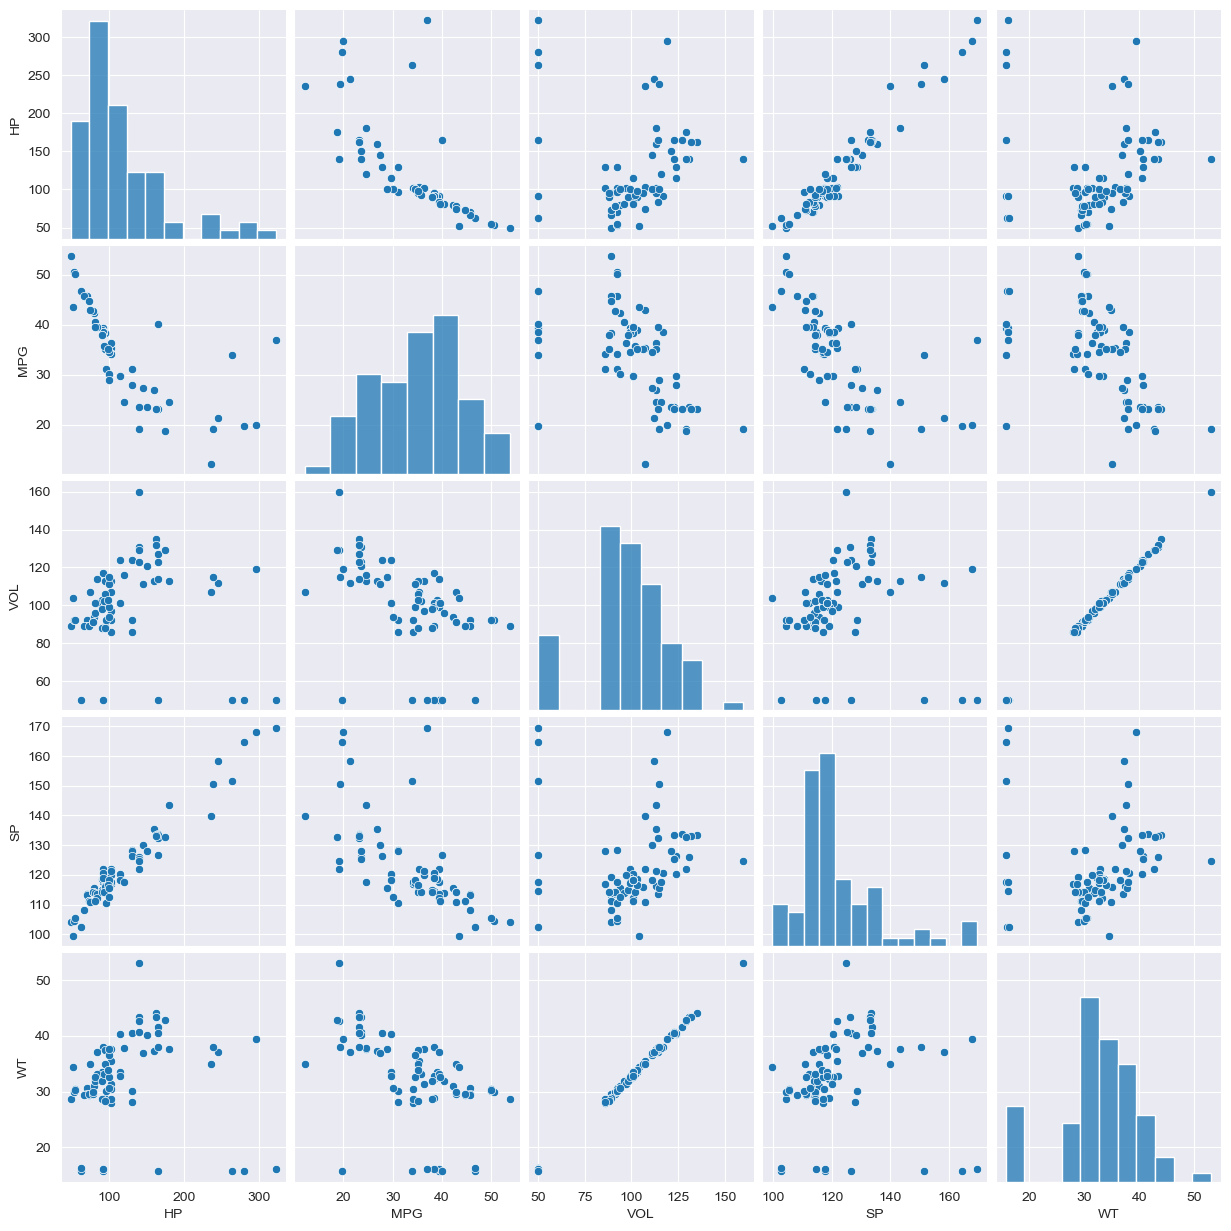

In [61]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [62]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


### Observation from correlation plots and corffients

- Between x and y, all the x variables are showing moderate to high correlation strengths, highest being between HP and MPG
- Therefore this dataset qualifies for building a multiple linear regression model to predict MPG
- Among x columns (x1,x2,x3 and x4), some very high correlation strengths are observed between SP vs HP, VOL vs WT
- The high correlation among x columns is not desirable as it might lead to multicollinearity problem

In [64]:
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        11:18:33   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observation from model summary
- The R-squared and adjusted R-suared values are good and about 75% of variability in Y is explained by X columns
- The probability value with respect to F-statistic is close to zero, indicating that all or someof X columns are significant
- The p-values for VOL and WT are higher than 5% indicating some interaction issue among themselves, which need to be further explored

### Performance metrics for model1

In [68]:
df1 = pd.DataFrame()
df1["actual_y1"] = cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [76]:
pred_y1 = model.predict(cars.iloc[:, 0:4])
df1["pred_y1"] = pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :", mean_squared_error(df1["actual_y1"], df1["pred_y1"]) )


MSE : 18.897141152343096
